In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# load data
raw_data = pd.read_csv('DisneylandReviews.csv', encoding='latin')
raw_data.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


In [4]:
raw_data.Branch.value_counts()

Disneyland_California    19406
Disneyland_Paris         13630
Disneyland_HongKong       9620
Name: Branch, dtype: int64

In [5]:
raw_data.Reviewer_Location.value_counts()

United States     14551
United Kingdom     9751
Australia          4679
Canada             2235
India              1511
                  ...  
Namibia               1
Armenia               1
Timor-Leste           1
South Sudan           1
Åland Islands         1
Name: Reviewer_Location, Length: 162, dtype: int64

In [6]:
# Random text
idx = raw_data.sample(1).index[0]
print(raw_data['Review_Text'].iloc[idx])

Loads to occupy all ages,especially enjoyed Hollywood studios ,the tram tour and the stunt show.Wild west show excellent all round fun and good food made the evening even better.Annette's diner,excellent food ,great staff and huge portions!! Need more water fountains or water selling vendors in the parks.


##### Observation:
* preprocessing needed:
1. make text lowercase.
2. remove stopwords.
3. remove punctuation.
4. tokenization
5. Stemming
6. Lemmatization.


In [7]:
data = pd.DataFrame(raw_data['Review_Text'])
data.head()

,Review_Text
0,If you've ever been to Disneyland anywhere you...
1,Its been a while since d last time we visit HK...
2,Thanks God it wasn t too hot or too humid wh...
3,HK Disneyland is a great compact park. Unfortu...
4,"the location is not in the city, took around 1..."


#### *1. make text lowercase*


In [8]:
data['lowercase'] = data['Review_Text'].str.lower()
data.head()

,Review_Text,lowercase
0,If you've ever been to Disneyland anywhere you...,if you've ever been to disneyland anywhere you...
1,Its been a while since d last time we visit HK...,its been a while since d last time we visit hk...
2,Thanks God it wasn t too hot or too humid wh...,thanks god it wasn t too hot or too humid wh...
3,HK Disneyland is a great compact park. Unfortu...,hk disneyland is a great compact park. unfortu...
4,"the location is not in the city, took around 1...","the location is not in the city, took around 1..."


#### *2. remove stopwords*

In [9]:
en_stopwords = stopwords.words('english')
en_stopwords.remove("not")

In [10]:
data['no_stopwords'] = data['lowercase'].apply(lambda x: ' '.join([word for word in x.split() if word not in (en_stopwords)]))
data.head()

,Review_Text,lowercase,no_stopwords
0,If you've ever been to Disneyland anywhere you...,if you've ever been to disneyland anywhere you...,ever disneyland anywhere find disneyland hong ...
1,Its been a while since d last time we visit HK...,its been a while since d last time we visit hk...,"since last time visit hk disneyland .. yet, ti..."
2,Thanks God it wasn t too hot or too humid wh...,thanks god it wasn t too hot or too humid wh...,thanks god hot humid visiting park otherwise w...
3,HK Disneyland is a great compact park. Unfortu...,hk disneyland is a great compact park. unfortu...,hk disneyland great compact park. unfortunatel...
4,"the location is not in the city, took around 1...","the location is not in the city, took around 1...","location not city, took around 1 hour kowlon, ..."


In [11]:
# Random text
idx = data.sample(1).index[0]
print(data['no_stopwords'].iloc[idx])

bought tram disney ocean park package hk airport (cheaper includes one meal). rides appropriate 4 year old. calculations right may skip queue rides lol. food choices nothing brag about, generally inexpensive compare ocean park ridiculous distasteful!


#### *3. remove punctuation*


In [12]:
data['no_punct'] = data.apply(lambda x: re.sub(r"([^\w\s]|[\d])", "", x['no_stopwords']), axis=1)
data.head()

,Review_Text,lowercase,no_stopwords,no_punct
0,If you've ever been to Disneyland anywhere you...,if you've ever been to disneyland anywhere you...,ever disneyland anywhere find disneyland hong ...,ever disneyland anywhere find disneyland hong ...
1,Its been a while since d last time we visit HK...,its been a while since d last time we visit hk...,"since last time visit hk disneyland .. yet, ti...",since last time visit hk disneyland yet time ...
2,Thanks God it wasn t too hot or too humid wh...,thanks god it wasn t too hot or too humid wh...,thanks god hot humid visiting park otherwise w...,thanks god hot humid visiting park otherwise w...
3,HK Disneyland is a great compact park. Unfortu...,hk disneyland is a great compact park. unfortu...,hk disneyland great compact park. unfortunatel...,hk disneyland great compact park unfortunately...
4,"the location is not in the city, took around 1...","the location is not in the city, took around 1...","location not city, took around 1 hour kowlon, ...",location not city took around hour kowlon kid...


In [13]:
# Random text
idx = data.sample(1).index[0]
print(data['no_punct'].iloc[idx])

last minute thing amazing first time iv ever hope go one day bit planning managed get rides wanted go run time really enjoy hole  parks 


#### *4. tokenization*

In [14]:
data['tokenized'] = data.apply(lambda x: word_tokenize(x['no_punct']), axis=1)
data.head(3)

,Review_Text,lowercase,no_stopwords,no_punct,tokenized
0,If you've ever been to Disneyland anywhere you...,if you've ever been to disneyland anywhere you...,ever disneyland anywhere find disneyland hong ...,ever disneyland anywhere find disneyland hong ...,"[ever, disneyland, anywhere, find, disneyland,..."
1,Its been a while since d last time we visit HK...,its been a while since d last time we visit hk...,"since last time visit hk disneyland .. yet, ti...",since last time visit hk disneyland yet time ...,"[since, last, time, visit, hk, disneyland, yet..."
2,Thanks God it wasn t too hot or too humid wh...,thanks god it wasn t too hot or too humid wh...,thanks god hot humid visiting park otherwise w...,thanks god hot humid visiting park otherwise w...,"[thanks, god, hot, humid, visiting, park, othe..."


#### 5. *stemming*

In [15]:
ps = PorterStemmer()

In [16]:
data['stemmed'] = data['tokenized'].apply(lambda tokens: [ps.stem(token) for token in tokens])
data.head()

,Review_Text,lowercase,no_stopwords,no_punct,tokenized,stemmed
0,If you've ever been to Disneyland anywhere you...,if you've ever been to disneyland anywhere you...,ever disneyland anywhere find disneyland hong ...,ever disneyland anywhere find disneyland hong ...,"[ever, disneyland, anywhere, find, disneyland,...","[ever, disneyland, anywher, find, disneyland, ..."
1,Its been a while since d last time we visit HK...,its been a while since d last time we visit hk...,"since last time visit hk disneyland .. yet, ti...",since last time visit hk disneyland yet time ...,"[since, last, time, visit, hk, disneyland, yet...","[sinc, last, time, visit, hk, disneyland, yet,..."
2,Thanks God it wasn t too hot or too humid wh...,thanks god it wasn t too hot or too humid wh...,thanks god hot humid visiting park otherwise w...,thanks god hot humid visiting park otherwise w...,"[thanks, god, hot, humid, visiting, park, othe...","[thank, god, hot, humid, visit, park, otherwis..."
3,HK Disneyland is a great compact park. Unfortu...,hk disneyland is a great compact park. unfortu...,hk disneyland great compact park. unfortunatel...,hk disneyland great compact park unfortunately...,"[hk, disneyland, great, compact, park, unfortu...","[hk, disneyland, great, compact, park, unfortu..."
4,"the location is not in the city, took around 1...","the location is not in the city, took around 1...","location not city, took around 1 hour kowlon, ...",location not city took around hour kowlon kid...,"[location, not, city, took, around, hour, kowl...","[locat, not, citi, took, around, hour, kowlon,..."


#### *6. lemmatization*


In [17]:
lm = WordNetLemmatizer()

In [18]:
data['lemmatized'] = data['tokenized'].apply(lambda tokens: [lm.lemmatize(token) for token in tokens])
data.head()

BadZipFile: File is not a zip file

## vectorization

In [ ]:
countvec = CountVectorizer(max_features=5000, min_df=5)

In [20]:
stemd = data['stemmed'].apply(lambda tokens: ' '.join(tokens))
countvec_fit = countvec.fit_transform(stemd)

In [21]:
bag_of_words = pd.DataFrame(countvec_fit.toarray(), columns = countvec.get_feature_names_out())

In [22]:
bag_of_words

,aaa,abandon,abil,abit,abl,abound,about,abov,abroad,abrupt,...,yuck,yum,yummi,zealand,zero,zip,zocalo,zone,zoo,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42651,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42652,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42653,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42654,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## modeling

In [23]:
y = raw_data['Rating']

In [24]:
# split into train and test data
X_train, X_test, y_train, y_test = train_test_split(bag_of_words, y, test_size=0.2, random_state = 42)

#### Logistic Regression

In [25]:
lr = LogisticRegression(random_state=0)

In [26]:
lr.fit(X_train, y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [27]:
lr_pred = lr.predict(X_test)

In [41]:
print('accuracy: ', accuracy_score(y_test, lr_pred))
print('precision: ', precision_score(y_test, lr_pred, average='macro'))
print('recall: ', recall_score(y_test, lr_pred, average='macro'))


accuracy:  0.5955227379278012
precision:  0.43937022401672643
recall:  0.41258950646916726


In [30]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           1       0.37      0.35      0.36       292
           2       0.30      0.22      0.26       428
           3       0.39      0.33      0.36      1035
           4       0.42      0.32      0.36      2200
           5       0.71      0.84      0.77      4577

    accuracy                           0.60      8532
   macro avg       0.44      0.41      0.42      8532
weighted avg       0.57      0.60      0.58      8532



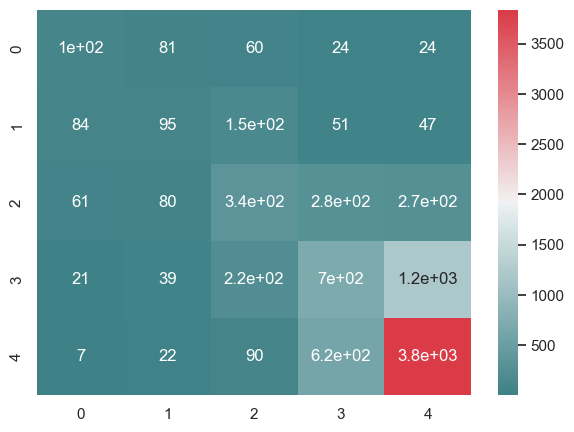

In [60]:
#confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, lr_pred),annot=True,cmap=sns.diverging_palette(200, 10, as_cmap=True,center='light'))
plt.show()

#### Naive Bayes

In [32]:
nb = MultinomialNB()

In [33]:
nb.fit(X_train, y_train)

MultinomialNB()

In [34]:
nb_pred = nb.predict(X_test)

In [42]:
print('accuracy: ', accuracy_score(y_test, nb_pred))
print('precision: ', precision_score(y_test, nb_pred, average='macro'))
print('recall: ', recall_score(y_test, nb_pred, average='macro'))

accuracy:  0.5932958274730427
precision:  0.4379206887157103
recall:  0.44298730235599126


In [36]:
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           1       0.35      0.47      0.41       292
           2       0.31      0.26      0.28       428
           3       0.36      0.31      0.34      1035
           4       0.43      0.37      0.39      2200
           5       0.74      0.80      0.77      4577

    accuracy                           0.59      8532
   macro avg       0.44      0.44      0.44      8532
weighted avg       0.58      0.59      0.58      8532



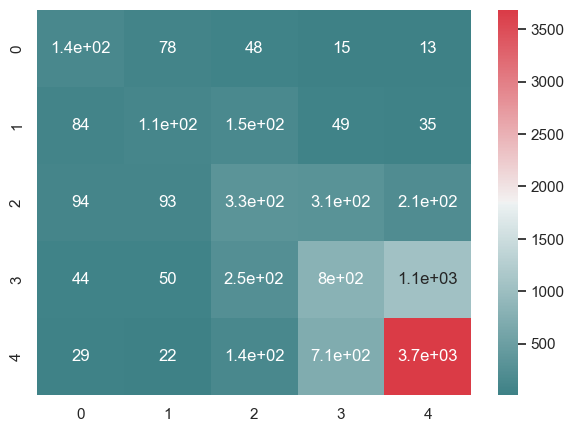

In [61]:
#confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, nb_pred),annot=True,cmap=sns.diverging_palette(200, 10, as_cmap=True,center='light'))
plt.show()

#### SGD classifier

In [43]:
sgd = SGDClassifier()

In [44]:
sgd.fit(X_train, y_train)

SGDClassifier()

In [45]:
sgd_pred = sgd.predict(X_test)

In [46]:
print('accuracy: ', accuracy_score(y_test, sgd_pred))
print('precision: ', precision_score(y_test, sgd_pred, average='macro'))
print('recall: ', recall_score(y_test, sgd_pred, average='macro'))

accuracy:  0.5887248007501172
precision:  0.42192613729587
recall:  0.398323234957619


In [ ]:
print(classification_report(y_test, sgd_pred))

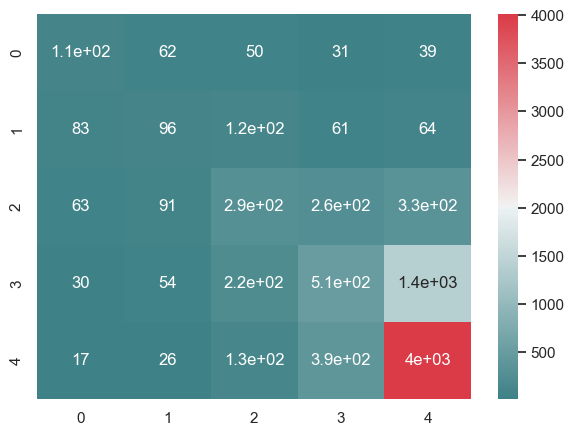

In [62]:
#confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, sgd_pred),annot=True,cmap=sns.diverging_palette(200, 10, as_cmap=True,center='light'))
plt.show()

#### Random forest

In [48]:
rf = RandomForestClassifier()

In [49]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
rf_pred = rf.predict(X_test)

In [52]:
print('accuracy: ', accuracy_score(y_test, rf_pred))
print('precision: ', precision_score(y_test, rf_pred, average='macro'))
print('recall: ', recall_score(y_test, rf_pred, average='macro'))

accuracy:  0.5578996718237225
precision:  0.45212221499315997
recall:  0.23284504250582186


In [53]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           1       0.40      0.01      0.01       292
           2       0.57      0.02      0.04       428
           3       0.36      0.05      0.09      1035
           4       0.35      0.11      0.17      2200
           5       0.58      0.97      0.73      4577

    accuracy                           0.56      8532
   macro avg       0.45      0.23      0.21      8532
weighted avg       0.49      0.56      0.45      8532



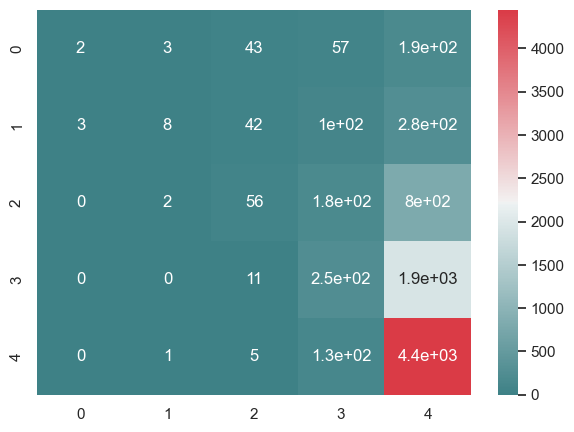

In [63]:
#confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, rf_pred),annot=True,cmap=sns.diverging_palette(200, 10, as_cmap=True,center='light'))
plt.show()

### TF-IDF vectorizer

In [19]:
tfidfvec = TfidfVectorizer(max_features=5000, min_df=5)

In [20]:
stemd = data['stemmed'].apply(lambda tokens: ' '.join(tokens))
tfidfvec_fit = tfidfvec.fit_transform(stemd)

In [21]:
tfidf_bag = pd.DataFrame(tfidfvec_fit.toarray(), columns = tfidfvec.get_feature_names_out())


In [22]:
tfidf_bag


,aaa,abandon,abil,abit,abl,abound,about,abov,abroad,abrupt,...,yuck,yum,yummi,zealand,zero,zip,zocalo,zone,zoo,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42653,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### modeling 

In [26]:
# split into train and test data
y = raw_data['Rating']
X_train2, X_test2, y_train2, y_test2 = train_test_split(tfidf_bag, y, test_size=0.2, random_state = 42)

#### Logistic Regression

In [38]:
lr2 = LogisticRegression(random_state=0)

In [39]:
lr2.fit(X_train2, y_train2)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [40]:
lr2_pred = lr2.predict(X_test2)

In [41]:
print('accuracy after TF-IDF: ', accuracy_score(y_test2, lr2_pred))
print('precision after TF-IDF: ', precision_score(y_test2, lr2_pred, average='macro'))
print('recall after TF-IDF: ', recall_score(y_test2, lr2_pred, average='macro'))

accuracy after TF-IDF:  0.6170886075949367
precision after TF-IDF:  0.49487730063130825
recall after TF-IDF:  0.404938162572987


In [42]:
print(classification_report(y_test2, lr2_pred))

              precision    recall  f1-score   support

           1       0.53      0.30      0.39       292
           2       0.37      0.17      0.23       428
           3       0.41      0.34      0.37      1035
           4       0.45      0.34      0.38      2200
           5       0.71      0.88      0.78      4577

    accuracy                           0.62      8532
   macro avg       0.49      0.40      0.43      8532
weighted avg       0.58      0.62      0.59      8532



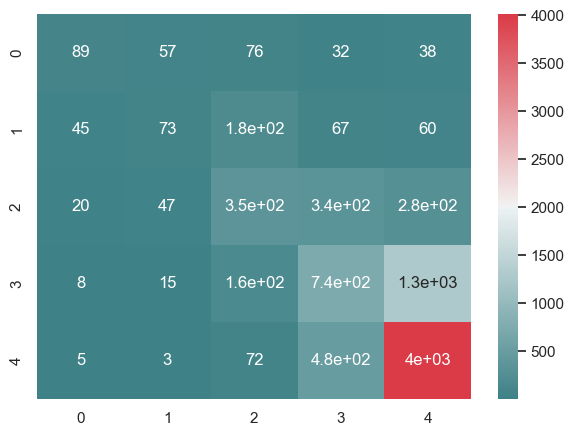

In [43]:
#confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test2, lr2_pred),annot=True,cmap=sns.diverging_palette(200, 10, as_cmap=True,center='light'))
plt.show()

#### we can observe that this is better with TF-IDF than with bag of words

#### Naive Bayes

In [44]:
nb2 = MultinomialNB()

In [45]:
nb2.fit(X_train2, y_train2)

MultinomialNB()

In [46]:
nb2_pred = nb2.predict(X_test2)

In [47]:
print('accuracy after TF-IDF: ', accuracy_score(y_test2, nb2_pred))
print('precision after TF-IDF: ', precision_score(y_test2, nb2_pred, average='macro'))
print('recall after TF-IDF: ', recall_score(y_test2, nb2_pred, average='macro'))

accuracy after TF-IDF:  0.5671589310829818
precision after TF-IDF:  0.45051396354705764
recall after TF-IDF:  0.24709802506572184


In [48]:
print(classification_report(y_test2, lr2_pred))

              precision    recall  f1-score   support

           1       0.53      0.30      0.39       292
           2       0.37      0.17      0.23       428
           3       0.41      0.34      0.37      1035
           4       0.45      0.34      0.38      2200
           5       0.71      0.88      0.78      4577

    accuracy                           0.62      8532
   macro avg       0.49      0.40      0.43      8532
weighted avg       0.58      0.62      0.59      8532



In [64]:
raw_data.Rating.value_counts()

5    23146
4    10775
3     5109
2     2127
1     1499
Name: Rating, dtype: int64

<Axes: >

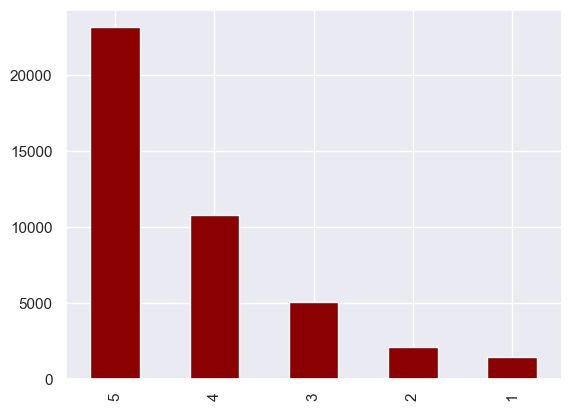

In [67]:
raw_data.Rating.value_counts().plot.bar(color='darkred')

##### Observation:
*we notice data imbalance*